<a href="https://colab.research.google.com/github/etckanikama/practice-repository/blob/main/zero.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


# シグモイド関数
def sigmoid(x):
  return 1/(1 + np.exp(-x))

#三層ニューラルネットワークの実装 2(入力) x 3(隠れ層) x 2(隠れ層) x 2（出力）
# A = XW + B　を実装する
X = np.array([1.0,0.5])
W1 = np.array([[0.1, 0.3, 0.5],[0.2, 0.4, 0.6]]) #2x3の大きさ
B1 = np.array([0.1, 0.2, 0.3])
A1 = np.dot(X, W1) + B1
Z1 = sigmoid(A1)

W2 = np.array([[0.1,0.4],[0.2,0.5],[0.3,0.6]])#3x2の大きさ
B2 = np.array([0.1, 0.2])
A2 = np.dot(Z1,W2) + B2
Z2 = sigmoid(A2)

W3 = np.array([[0.1,0.3],[0.2,0.4]])
B3 = np.array([0.1, 0.2])
A3 = np.dot(Z2,W3) + B3

# 恒等関数：入力したものをそのまま出力する関数
def identity_function(x):
  return x

Y = identity_function(A3)
print(Y)

[0.31682708 0.69627909]


In [ ]:
# ソフトマックス関数
def softmax(a):
  c = np.max(a)
  exp_a = np.exp(a - c) # オーバーフロー対策
  sum_exp_a = np.sum(exp_a)
  y = exp_a / sum_exp_a
  return y



In [ ]:
#  kerasにあるmnistのデータセットをダウンロード
from keras.datasets import mnist
(x_train, t_train),(x_test,t_test) = mnist.load_data()
print(x_train.shape[1]*x_train.shape[2])
print(t_train.shape)
print(t_test.shape)

784
(60000,)
(10000, 28, 28)
(10000,)


5
(28, 28)


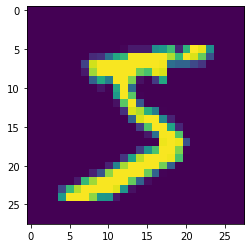

In [ ]:
# 画像の表示
from PIL import Image

def img_show(img):
    # numpy配列として一次元で格納されたデータをpil用のデータオブジェクトに変換する必要がある
    pil_img = Image.fromarray(np.uint8(img))
    # print(pil_img)
    plt.imshow(np.array(pil_img))

(x_train, t_train), (x_test, t_test) = mnist.load_data()

img = x_train[0]
label = t_train[0]
print(label)  # 5
print(img.shape)  # (28, 28)
# print(img)

img_show(img)

In [ ]:
# ネットワークの作成
# 入力層 784個（28x28）,出力層 10個のニューロン
# 隠れ層：２つ（一個目：50個、二個目：100個のニューロン）
# この隠れ層のニューロン数は任意で設定できる

In [43]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [45]:
import os 
os.getcwd()
os.chdir('/content/drive/My Drive/colabonotebooks')
os.getcwd()

'/content/drive/My Drive/colabonotebooks'

In [47]:
import numpy as np
import pandas as pd
import pickle
from keras.datasets import mnist
import time

def get_data():
    (x_train, t_train), (x_test, t_test) = mnist.load_data()
    return x_test.reshape(10000, 784), t_test


def init_network():
    # 学習済み重みのパラメータを読み込む：重みとバイアスがディクショナリ型で入っている
    with open("sample_weight.pkl",'rb') as f:
      network = pickle.load(f)
    
    return network


def predict(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = softmax(a3)

    return y

# 
x, t = get_data()
network = init_network()
accuracy_cnt = 0

t1 = time.time()
for i in range(len(x)):
    y = predict(network, x[i])
    p= np.argmax(y) # 最も確率の高い要素のインデックスを取得
    if p == t[i]:
        accuracy_cnt += 1

t2 = time.time()
print('time: ' + str(t2 - t1))
print("Accuracy:" + str(float(accuracy_cnt) / len(x)))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: overflow encountered in exp
  import sys


time: 0.8193418979644775
Accuracy:0.9207


In [52]:
y


array([7.18617885e-05, 6.99372379e-07, 4.32665547e-04, 3.58768062e-07,
       1.75180752e-03, 1.07496104e-04, 9.97633696e-01, 1.28286771e-07,
       9.95844516e-07, 3.49772051e-07], dtype=float32)

In [58]:
x,_ = get_data()
network = init_network()
W1,W2,W3 =  network['W1'], network['W2'], network['W3']
print(x.shape)
print(x[0].shape)
print(W1.shape)
print(W2.shape)
print(W3.shape)
print(y.shape)

(10000, 784)
(784,)
(784, 50)
(50, 100)
(100, 10)
(10,)


・バッチ：まとまりのある複数の入力データ

・バッチ処理:一枚当たりの処理時間を大幅に短縮できる

In [60]:
import numpy as np
import pandas as pd
import pickle
from keras.datasets import mnist
import time

def get_data():
    (x_train, t_train), (x_test, t_test) = mnist.load_data()
    return x_test.reshape(10000, 784), t_test


def init_network():
    # 学習済み重みのパラメータを読み込む：重みとバイアスがディクショナリ型で入っている
    with open("sample_weight.pkl",'rb') as f:
      network = pickle.load(f)
    
    return network


def predict(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = softmax(a3)

    return y


x, t = get_data()
network = init_network()

batch_size = 100 # バッチの数
accuracy_cnt = 0

t1 = time.time()
for i in range(0,len(x),batch_size):
    x_batch = x[i:i+batch_size] # x[0:100],x[100:200]....
    y_batch = predict(network, x_batch)
    p= np.argmax(y_batch,axis=1) # 最も確率の高い要素のインデックスを取得
    # if p == t[i]:
    #     accuracy_cnt += 1
    accuracy_cnt += np.sum(p == t[i:i+batch_size])

t2 = time.time()
print('time: ' + str(t2 - t1))
print("Accuracy:" + str(float(accuracy_cnt) / len(x)))

time: 0.07541918754577637
Accuracy:0.9207


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: overflow encountered in exp
  import sys


In [64]:
print(y)
print(p)
print(accuracy_cnt)

[7.18617885e-05 6.99372379e-07 4.32665547e-04 3.58768062e-07
 1.75180752e-03 1.07496104e-04 9.97633696e-01 1.28286771e-07
 9.95844516e-07 3.49772051e-07]
[8 4 0 1 2 9 4 5 6 7 8 0 1 2 3 4 9 8 9 7 8 6 4 1 9 3 8 4 4 7 0 1 9 2 8 7 8
 2 6 0 0 6 3 3 8 9 1 4 0 6 1 0 0 6 2 1 1 7 7 8 4 6 0 7 0 3 6 8 7 1 3 2 4 9
 4 2 6 4 1 7 2 6 2 0 1 2 8 4 5 6 7 8 9 0 1 2 3 4 8 6]
9207
